<a href="https://colab.research.google.com/github/Vampiref10/2_Terminal_Hacker/blob/main/Project2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('covid_19_data.csv')

In [ ]:
#Percentage of NAN Values
NAN = [(c, data[c].isna().mean()*100) for c in data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,ObservationDate,0.0
1,Country/Region,0.0
2,Last Update,0.0
3,Confirmed,0.0
4,Deaths,0.0
5,Recovered,0.0


In [ ]:
data.head()


,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0
1,1/22/2020,Mainland China,1/22/2020 17:00,14,0,0
2,1/22/2020,Mainland China,1/22/2020 17:00,6,0,0
3,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0
4,1/22/2020,Mainland China,1/22/2020 17:00,0,0,0


In [ ]:
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
1,1/22/2020,Mainland China,1/22/2020 17:00,14,0,0,14
2,1/22/2020,Mainland China,1/22/2020 17:00,6,0,0,6
3,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
4,1/22/2020,Mainland China,1/22/2020 17:00,0,0,0,0


In [ ]:
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [ ]:
data.head()


,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
1,1/22/2020,Mainland China,1/22/2020 17:00,14,0,0,14
2,1/22/2020,Mainland China,1/22/2020 17:00,6,0,0,6
3,1/22/2020,Mainland China,1/22/2020 17:00,1,0,0,1
4,1/22/2020,Mainland China,1/22/2020 17:00,0,0,0,0


In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the word : ',
)
fig.show()

In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',marker_color='red',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='red',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
DS = data [(data['Country/Region'] == 'Saudi Arabia') ].reset_index(drop=True)
DS.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,3/2/2020,Saudi Arabia,2020-03-02T23:53:02,1,0,0,1
1,3/3/2020,Saudi Arabia,2020-03-02T23:53:02,1,0,0,1
2,3/4/2020,Saudi Arabia,2020-03-02T23:53:02,1,0,0,1
3,3/5/2020,Saudi Arabia,2020-03-05T17:53:03,5,0,0,5
4,3/6/2020,Saudi Arabia,2020-03-05T17:53:03,5,0,0,5


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Deaths'],name='Deaths',
                                   marker_color='Gray',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Saudi Arabia',
        template='plotly_dark'

)

fig.show()

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np


In [ ]:
DS.dtypes

ObservationDate    object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Active_case         int64
dtype: object

In [ ]:
DS['Recovered'] = DS.Recovered.astype(float)

In [ ]:
DSS = DS[['Confirmed','Deaths','Recovered','Active_case']]

In [ ]:
DSS.dtypes

Confirmed        int64
Deaths           int64
Recovered      float64
Active_case      int64
dtype: object

In [ ]:
train_size = int(len(DSS)*0.7)
test_size = len(DSS) - train_size
train, test = DSS.iloc[0:train_size], DSS.iloc[train_size:len(DSS)]
print(len(train), len(test))

181 78


In [ ]:
from sklearn.preprocessing import RobustScaler
f_columns = ['Confirmed', 'Deaths', 'Active_case']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)
Recovered_case_transformer = RobustScaler()
Recovered_case_transformer = Recovered_case_transformer.fit(train[['Recovered']])
train['Recovered'] = Recovered_case_transformer.transform(train[['Recovered']])
test['Recovered'] = Recovered_case_transformer.transform(test[['Recovered']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.Recovered, time_steps)
X_test, y_test = create_dataset(test, test.Recovered, time_steps)
print(X_train.shape, y_train.shape,)
print(X_test.shape,y_test.shape)

(171, 10, 4) (171,)
(68, 10, 4) (68,)


Epoch 1/200
4/4 [==============================] - 5s 286ms/step - loss: 0.0635 - val_loss: 0.1784
Epoch 2/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0242 - val_loss: 0.1252
Epoch 3/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0188 - val_loss: 0.1768
Epoch 4/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0045 - val_loss: 0.1915
Epoch 5/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0054 - val_loss: 0.1301
Epoch 6/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0040 - val_loss: 0.0641
Epoch 7/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0023 - val_loss: 0.0317
Epoch 8/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0022 - val_loss: 0.0250
Epoch 9/200
4/4 [==============================] - 0s 36ms/step - loss: 0.0027 - val_loss: 0.0285
Epoch 10/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0017 - val_loss: 0.0329
Epoch 11/200
4/4 [

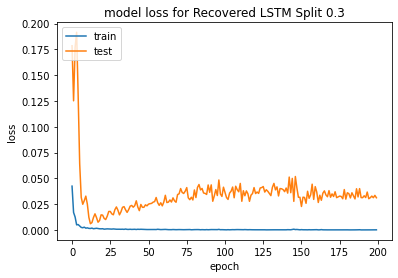

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for Recovered LSTM Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
4/4 [==============================] - 1s 59ms/step - loss: 0.1015 - val_loss: 0.6463
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0291 - val_loss: 0.3360
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0075 - val_loss: 0.1429
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0021 - val_loss: 0.0660
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0547
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0040 - val_loss: 0.0734
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 0.1074
Epoch 8/200
4/4 [==============================] - 0s 17ms/step - loss: 9.1980e-04 - val_loss: 0.1340
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 9.4268e-04 - val_loss: 0.1361
Epoch 10/200
4/4 [==============================] - 0s 17ms/step - loss: 9.1410e-04 - val_loss: 0.1131
Epoch 1

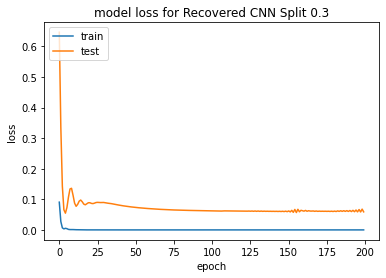

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for Recovered CNN Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
4/4 [==============================] - 2s 101ms/step - loss: 0.0716 - val_loss: 0.9977
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0571 - val_loss: 1.0001
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0476 - val_loss: 1.0057
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0400 - val_loss: 1.0121
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 0.0333 - val_loss: 1.0175
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0272 - val_loss: 1.0214
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0218 - val_loss: 1.0235
Epoch 8/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0172 - val_loss: 1.0232
Epoch 9/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 1.0185
Epoch 10/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0120 - val_loss: 1.0053
Epoch 11/200
4/4 [

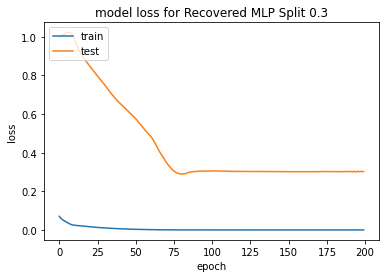

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

    # compile model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
X_train, y_train,
epochs=200,
batch_size=32,
validation_split=0.3,
shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for Recovered MLP Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()